In [79]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from dataset_loader import CustomDataSet
from model import LA_WKN_BiGRU

work_condition = 1
batch_size = 32

Test_set = 'F:/git_repo/WKN_SSO/viberation_dataset/Test_set/'
# Test_set = "/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set/"
test_data = CustomDataSet(Test_set, work_condition, mode='test')
test_loader = DataLoader(test_data, batch_size=batch_size)

model = LA_WKN_BiGRU()  # 请替换为你的模型类
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LA_WKN_BiGRU().to(device)
model.load_state_dict(torch.load('your_model.pth'))  # 请替换为你的模型.pth文件的路径
model.eval()  # 切换模型为评估模式

with torch.no_grad():
    for data in test_loader:
        inputs = data[0].to(device)
        # check if data size = 2560, if not, pop
        if data.size() != torch.Size([32, 1, 2560]):
            continue
        print(data)
        data = data.to(device)
        outputs = model(data)

print(outputs)

ModuleNotFoundError: No module named 'model'

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from dataset_loader import CustomDataSet
from model import LA_WKN_BiGRU
from utils import *

model = LA_WKN_BiGRU()
model.load_state_dict(torch.load('your_model.pth'))
model.eval()

In [ ]:
rnd_input = np.random.randn(1,2560)
rnd_input = min_max_scale(rnd_input)
rnd_input = torch.from_numpy(rnd_input.astype(np.float32))

print(rnd_input.shape)
predicted_remaining_life = model(rnd_input)

print(f'Predicted Remaining Life: {predicted_remaining_life.item()}')

In [ ]:
testing_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set'
wc = 1
test_data = CustomDataSet(testing_set, wc)
test_loader = DataLoader(test_data)

for data, labels in test_loader:
    print(data.shape)


In [ ]:
input_tensor = torch.Tensor(input_data)

with torch.no_grad():
    predicted_remaining_life = model(input_tensor)

print(f'Predicted Remaining Life: {predicted_remaining_life.item()}')

In [ ]:
def tefuc(a, b, mode):
    if mode == 'train':
        return a
    elif mode == 'test':
        return b

In [ ]:
ans = tefuc('a' , 'b', 'test')
ans

In [ ]:
import os
import pandas as pd

def count_rows_in_csv(folder_path):
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

    for file_path in file_paths:
        try:
            # 讀取 CSV 檔案
            df = pd.read_csv(file_path, header=None)
            
            # 取得行數
            row_count = len(df)
            
            if row_count == 2560:
                pass
                # print("File: {}".format(file_path))
            else:
                print("File: {}, Rows: {}".format(file_path,row_count))

        except Exception as e:
            print(f"Error reading file {file_path}: {e}")

# 指定你的資料夾路徑
folder_path = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set/Bearing1_3'

# 呼叫函數
count_rows_in_csv(folder_path)
print("done")


In [ ]:
from utils import *

file1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set/Bearing1_4/acc_01139.csv'
file2 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set/Bearing1_4/temp_00001.csv'

f1 = check_full_data(file1)
f2 = check_full_data(file2)

print("file1 is {}, file2 is {}".format(f1, f2))

In [ ]:
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Test_set/Bearing1_7'
work_condition = 1
file_path = []
wc = 'Bearing'
wc = wc + str(work_condition)

c=0
for files in os.listdir(root_dir):
    if files.endswith('.csv'):
        path = os.path.join(root_dir, files)
        path = os.path.normpath(path)
        full = check_full_data(path)
        if full:
            file_path.append(path)

print(file_path)

In [ ]:
len(file_path)

In [ ]:
# tensor([0.3998, 0.4485, 0.2712, 0.1878, 0.1446, 0.0863, 0.2053, 0.1519, 0.0755,
#         0.1702, 0.1287, 0.1066, 0.1160, 0.0705, 0.1018, 0.1555, 0.1689, 0.1638,
#         0.3471, 0.2113, 0.3736, 0.3620, 0.4069, 0.3740, 0.4477, 0.3586, 0.3707,
#         0.3914, 0.3194, 0.3759, 0.3546, 0.3307], device='cuda:0')
# size: torch.Size([19])
# tensor([0.4809, 0.4917, 0.5051, 0.4504, 0.4787, 0.4743, 0.4205, 0.4822, 0.5496,
#         0.4534, 0.4742, 0.3526, 0.2771, 0.2869, 0.4478, 0.5958, 0.3061, 0.4563,
#         0.5040], device='cuda:0')

In [ ]:
input1 = torch.randn(32)
input2 = torch.randn(32)
input3 = torch.randn(10)

s = input1.size()
s

torch.Size([32])

In [ ]:
s == torch.Size([32])

In [ ]:
val1 = input1.tolist()
type(val1)

list

In [ ]:
inputs = [input1,input2,input3]
inputs

[tensor([ 1.1105, -0.7077, -1.1141,  1.1590, -1.3130, -0.6327, -0.3028,  0.1422,
          0.8901,  2.5421, -1.7366,  0.4122,  0.8687,  1.6313,  1.1119, -1.1170,
          0.2145, -0.4108,  0.2041,  0.4355,  1.7658, -0.5047,  0.5288,  0.8238,
         -1.0623, -0.3077, -1.7248,  2.3880,  0.7674,  0.9270, -1.5932, -0.6276]),
 tensor([ 0.0425, -0.5647,  0.2471,  2.2562, -0.7736, -0.9029,  0.2505,  1.1557,
          1.1542,  0.3517,  1.8423, -1.3527,  0.4443,  0.6867,  0.6979, -2.1972,
          1.5808, -0.1194,  0.3383,  1.7181,  0.6177,  1.2742,  1.3476,  1.6420,
         -0.6325, -0.2150, -0.7152,  0.8843,  0.0074, -0.8066, -0.9381,  0.8445]),
 tensor([ 1.0532, -0.0898, -1.8274,  0.0601, -0.1940, -0.5492,  0.1076, -1.0339,
         -0.3436, -0.2493])]

In [ ]:
val = []
for input in inputs:
    tmp = input.tolist()
    val.append(tmp)

print(len(val))
print(len(val[2]))


3
10


In [ ]:
onedval = np.array(val).flatten().tolist()
onedval

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
len(onedval)

96

In [ ]:
from utils import *
root_dir = "F:/git_repo/WKN_SSO/viberation_dataset/Learning_set"
work_condition = 1
file_paths = []
wk = 'Bearing'
wk = wk + str(work_condition)
for folder in os.listdir(root_dir):
    if wk in folder:
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.csv'):
                    pathes = os.path.join(folder_path, filename)
                    pathes = os.path.normpath(pathes)
                    file_paths.append(pathes)

label = get_health_index(root_dir, file_paths[3],2)
file_paths[3]

'F:\\git_repo\\WKN_SSO\\viberation_dataset\\Learning_set\\Bearing1_1\\acc_00004.csv'

In [ ]:
label

0.9992857142857143

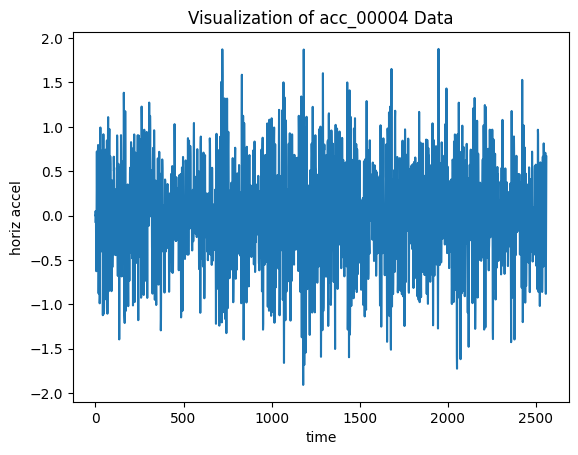

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 指定CSV檔案的路徑
csv_path = 'F:\\git_repo\\WKN_SSO\\viberation_dataset\\Learning_set\\Bearing1_1\\acc_00004.csv'

# 使用pandas讀取CSV檔案
df = pd.read_csv(csv_path, header=None, names=['hour', 'minute', 'second', 'microsecond', 'horiz accel', 'vert accel'])
inputs = df['horiz accel'].values.astype(float)
# 視覺化
plt.plot(inputs)
plt.title('Visualization of acc_00004 Data')
plt.xlabel('time')
plt.ylabel('horiz accel')
plt.show()

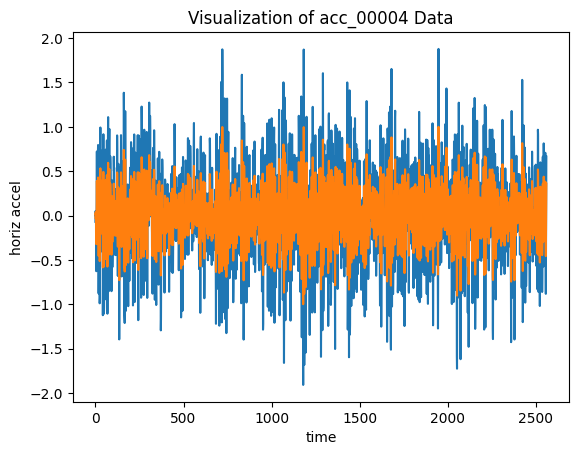

In [4]:
from utils import *

outputs = min_max_scale(inputs).reshape(1, -1)
plt.plot(inputs)
plt.plot(outputs.tolist()[0])
plt.title('Visualization of acc_00004 Data')
plt.xlabel('time')
plt.ylabel('horiz accel')
plt.show()

In [31]:
Test_set = 'F:/git_repo/WKN_SSO/viberation_dataset/Test_set/Bearing1_3'
Bearing_name = Test_set.split('/')[-1]
# Bearing_name
pic_name = Bearing_name + '.png'
pic_name


'Bearing1_3.png'

In [54]:
import torch 
import torch.nn as nn

testi = torch.rand(32, 32, 320)
print(testi.size())
testi = testi.permute(2, 0, 1)
print(testi.size())


torch.Size([32, 32, 320])
torch.Size([320, 32, 32])


In [56]:
bigru = nn.GRU(input_size=32, hidden_size=8, bidirectional=True)
msa = nn.MultiheadAttention(embed_dim=16, num_heads=4)
l0 = nn.Linear(5120, 64)
f = nn.Flatten()
l1 = nn.Linear(5120, 64)

testo1,_ = bigru(testi)
print(testo1.size())
testo1 = testo1.transpose(0, 1)

testo2,_ = msa(testo1,testo1,testo1)
# testo2 = testo2.permute(1, 0, 2)
print(testo2.size())

testo3 = f(testo1)
print(testo3.size())

testo4 = l1(testo3)
print(testo4.size())

torch.Size([320, 32, 16])
torch.Size([32, 320, 16])
torch.Size([32, 5120])
torch.Size([32, 64])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
l = 1800
hi = np.linspace(1, 0, l)

numpy.ndarray

In [ ]:
y_values = []
# 定義一個與 x_values 一樣長度的 y_values，這裡使用一個簡單的函數作為例子
for i in range(l):
    y_values.append(math.exp(-hi[i]))

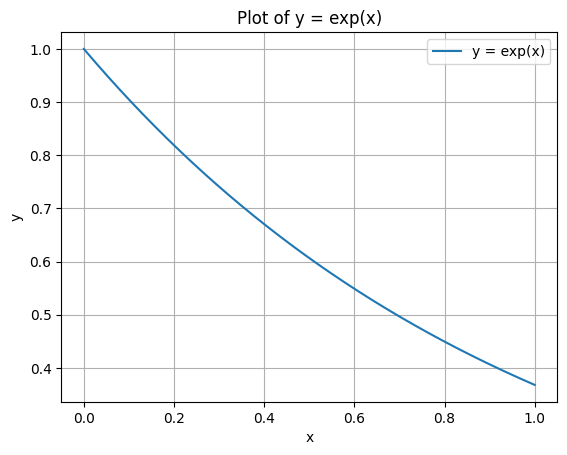

In [9]:
# 使用 matplotlib 繪製圖表
plt.plot(hi, y_values, label='y = exp(x)')
plt.title('Plot of y = exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()  # 顯示圖例
plt.grid(True)  # 顯示網格
plt.show()

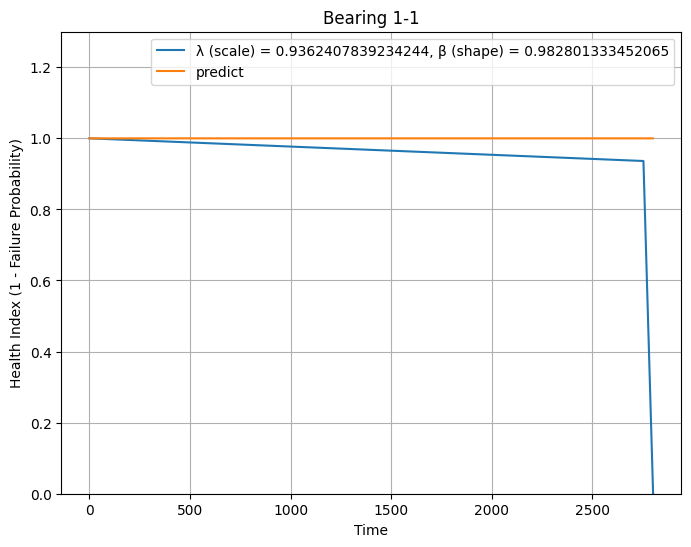

In [86]:
import matplotlib.pyplot as plt
import math
import numpy as np

def two_stage_hi(twist_point, slope, l):
    hi1_length = int(l * slope)
    hi2_length = l - hi1_length  # 確保總長度等於 l
    hi1 = np.linspace(1, twist_point, hi1_length)
    hi2 = np.linspace(twist_point, 0, hi2_length)
    hi = np.concatenate([hi1, hi2])

    return hi

le = 2803
t_e = np.linspace(0,le,le)
numpy_list = np.ones(2803)
# scale = random.uniform(0.5, 0.8)
# shape = random.uniform(0.5, 0.8)
scale = 0.9362407839234244
shape = 0.982801333452065
hi_t = two_stage_hi(scale, shape, le)
 

plt.figure(figsize=(8, 6))
plt.plot(t_e, hi_t, label=f"λ (scale) = {scale}, β (shape) = {shape}")
plt.plot(numpy_list, label="predict")
plt.title("Bearing 1-1")
plt.xlabel("Time")
plt.ylabel("Health Index (1 - Failure Probability)")
plt.ylim(0, 1.3)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
hi_t

array([1.        , 0.99255048, 0.98510097, 0.97765145, 0.97020194,
       0.96275242, 0.95530291, 0.94785339, 0.94040388, 0.93295436,
       0.92550485, 0.91805533, 0.91060582, 0.9031563 , 0.89570678,
       0.88825727, 0.88080775, 0.87335824, 0.86590872, 0.85845921,
       0.85100969, 0.84356018, 0.83611066, 0.82866115, 0.82121163,
       0.81376212, 0.8063126 , 0.79886308, 0.79141357, 0.78396405,
       0.77651454, 0.76906502, 0.76161551, 0.75416599, 0.74671648,
       0.73926696, 0.73181745, 0.72436793, 0.71691841, 0.7094689 ,
       0.70201938, 0.69456987, 0.68712035, 0.67967084, 0.67222132,
       0.66477181, 0.65732229, 0.64987278, 0.64242326, 0.63497375,
       0.62752423, 0.62007471, 0.6126252 , 0.60517568, 0.59772617,
       0.59772617, 0.58414148, 0.5705568 , 0.55697211, 0.54338743,
       0.52980274, 0.51621805, 0.50263337, 0.48904868, 0.475464  ,
       0.46187931, 0.44829463, 0.43470994, 0.42112526, 0.40754057,
       0.39395588, 0.3803712 , 0.36678651, 0.35320183, 0.33961

In [14]:
random_number_range = [(0.0001, 0.01), (1, 256), (1, 64), (1, 32), (1, 10), (0.1, 0.99)]
len(random_number_range)

6

In [87]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from dataset_loader import CustomDataSet
import time
import math

from models.LA_WKN_BiGRU import LA_WKN_BiGRU
from utils import *


trained_pth = "F:/git_repo/WKN_SSO/result/pth/noSSO_wc1_5st.pth"
Test_set = 'F:/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1'
# X = [0.02505566414342184, 73, 38, 2, 9, 0.2906707585596904, 0.30933146655082877, 0.9362407839234244, 0.9828013334520658]
X = [0.001, 64, 32, 3, 1, 0.5, 0.3, 0.8, 0.7]
work_condition = 1
batch_size = 32

Bearing_name = Test_set.split('/')[-1]
test_data = CustomDataSet(Test_set, work_condition, mode='test')
test_loader = DataLoader(test_data, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = LA_WKN_BiGRU(X).to(device)

model.load_state_dict(torch.load(trained_pth))
model.eval()

print("target: {}".format(Test_set))
ans = []
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        outputs = model(data)
        print("size: {}".format(outputs.size()))
        print(outputs)
        vals = outputs.tolist()
        for val in vals:
            ans.append(val)

cuda
target: F:/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1
size: torch.Size([32])
tensor([0.9639, 0.9605, 0.9609, 0.9614, 0.9692, 0.9670, 0.9721, 0.9593, 0.9680,
        0.9695, 0.9745, 0.9792, 0.9661, 0.9789, 0.9637, 0.9639, 0.9796, 0.9741,
        0.9705, 0.9697, 0.9645, 0.9753, 0.9731, 0.9695, 0.9618, 0.9648, 0.9545,
        0.9671, 0.9628, 0.9688, 0.9639, 0.9759], device='cuda:0')
size: torch.Size([32])
tensor([0.9555, 0.9670, 0.9654, 0.9650, 0.9702, 0.9639, 0.9635, 0.9671, 0.9639,
        0.9593, 0.9594, 0.9692, 0.9681, 0.9708, 0.9586, 0.9696, 0.9638, 0.9708,
        0.9625, 0.9723, 0.9785, 0.9732, 0.9665, 0.9669, 0.9646, 0.9669, 0.9614,
        0.9673, 0.9641, 0.9631, 0.9647, 0.9751], device='cuda:0')
size: torch.Size([32])
tensor([0.9550, 0.9720, 0.9664, 0.9640, 0.9690, 0.9680, 0.9645, 0.9656, 0.9685,
        0.9573, 0.9662, 0.9631, 0.9702, 0.9723, 0.9464, 0.9609, 0.9693, 0.9726,
        0.9643, 0.9672, 0.9711, 0.9652, 0.9639, 0.9695, 0.9682, 0.9637, 0.9675,
   

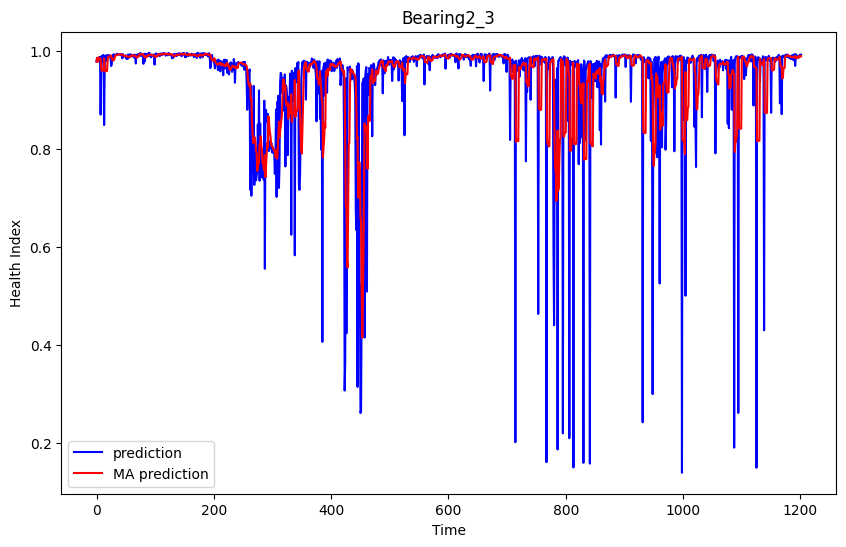

In [74]:
Bearing_name = Test_set.split('/')[-1]

plt.figure(figsize=(10, 6))

MA_result = moving_avg(ans, 5)
# plt.plot(hi_t, label='Label', color='black')
plt.plot(ans, label='prediction', color='blue')
plt.plot(MA_result, label='MA prediction', color='red')

plt.title('Bearing2_3')
plt.xlabel('Time')
plt.ylabel('Health Index')
plt.legend()